Import Library

In [2]:
import pandas as pd
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np  # Tambahkan import numpy

# import pandas as pd

# import re  # Pastikan modul ini diimpor
# from nltk.corpus import stopwords
# from nltk.stem import SnowballStemmer


# Unduh stopwords jika belum
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rebecca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Read and Print Data

In [3]:
# Baca file CSV
df = pd.read_csv('data/google-play-rev-gen-2.csv')

print(df.columns)

# Tampilkan isi kolom 'Nama'
df.head(10)

Index(['id', 'title', 'avatar', 'rating', 'snippet', 'likes', 'date',
       'iso_date', 'response'],
      dtype='object')


,id,title,avatar,rating,snippet,likes,date,iso_date,response
0,e5384431-56f9-43fa-a32a-53296afc7f66,Seraphim,https://play-lh.googleusercontent.com/a-/ALV-U...,3.0,"While I've reviewed this before, I decided to ...",88,"October 09, 2024",2024-10-09T00:08:20Z,NaN
1,6a73081f-3490-47ba-89fa-83744cb20940,TWOSTORE !,https://play-lh.googleusercontent.com/a-/ALV-U...,3.0,Very fun but I wish there was more fighting in...,35,"October 12, 2024",2024-10-12T06:39:01Z,NaN
2,3a3d4c90-0b6e-45dc-b1e6-014659055bbf,A G,https://play-lh.googleusercontent.com/a-/ALV-U...,3.0,"Fun game, I enjoy the story. There is tons to ...",11,"October 30, 2024",2024-10-30T18:01:37Z,NaN
3,99015538-1d26-4bd9-a02f-37bc2a361d1a,Astra,https://play-lh.googleusercontent.com/a-/ALV-U...,5.0,This game is phenomenal. The art style and sce...,77,"October 18, 2024",2024-10-18T19:11:12Z,NaN
4,541b3b4d-97f6-42e0-9c68-059a63e1e67f,Angela Williams,https://play-lh.googleusercontent.com/a-/ALV-U...,2.0,"I love this game. However, it is incredibly la...",14,"October 14, 2024",2024-10-14T03:04:43Z,NaN
5,ad484b6a-1b9c-42ab-9cee-9df6e28f12d4,Valerie,https://play-lh.googleusercontent.com/a-/ALV-U...,3.0,I used to be obsessed with this game but I hav...,99,"October 13, 2024",2024-10-13T14:02:08Z,NaN
6,fb25cdf6-40d8-44e8-b1b9-d439ebd88565,Daniel “Chotara” Ricciardi,https://play-lh.googleusercontent.com/a-/ALV-U...,5.0,Highly recommend. I have been playing the game...,65,"October 18, 2024",2024-10-18T15:20:11Z,NaN
7,36e821d3-9441-4eaa-94a7-9c7b9b7463b5,Amy,https://play-lh.googleusercontent.com/a-/ALV-U...,4.0,Hello! I absolutely love this game! It has inc...,29,"October 29, 2024",2024-10-29T00:27:08Z,NaN
8,4b1e6dcb-d251-450e-9be6-358b4bb8e9d6,Feitan Desy,https://play-lh.googleusercontent.com/a-/ALV-U...,4.0,I've been playing this game since January 16th...,64,"October 08, 2024",2024-10-08T23:13:09Z,NaN
9,27525772-1c0a-40e4-8321-4c5f0a0f7c64,Olivia Staringer,https://play-lh.googleusercontent.com/a-/ALV-U...,1.0,"Uninteresting characters, uninteresting dialog...",14,"November 11, 2024",2024-11-11T22:58:07Z,NaN


In [4]:
import pandas as pd
import os

# Membaca data dari file CSV
df = pd.read_csv('data/google-play-rev-gen-2.csv')

# Memilih kolom yang dibutuhkan
columns_to_keep = ['id', 'rating', 'snippet', 'likes', 'date', 'iso_date', 'response']
filtered_df = df[columns_to_keep]

# Membuat direktori jika belum ada
output_dir = 'new-review-data'
os.makedirs(output_dir, exist_ok=True)

# Menyimpan data baru ke file CSV
output_file = os.path.join(output_dir, 'filtered_reviews_gensin.csv')
filtered_df.to_csv(output_file, index=False)

print(f"new Data will be saved to {output_file}")

new Data will be saved to new-review-data/filtered_reviews_gensin.csv


Inisialisasi stopwords dan stemmer

In [5]:
# Inisialisasi stopwords dan stemmer
stop_words = list(stopwords.words('english'))  # Mengonversi set menjadi list
stemmer = SnowballStemmer('english')

Preprocessing

In [6]:
# Fungsi preprocessing
def preprocess_text(text):
    # Menghapus karakter khusus, angka, dan tanda baca
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    
    # Tokenisasi: Pisahkan teks menjadi list kata
    tokens = text.lower().split()
    
    # Menghapus stopwords dan stemming
    processed_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    
    # Gabungkan kembali tokens yang telah diproses menjadi teks yang bersih
    return ' '.join(processed_tokens)

# Baca dataset filtered_reviews.csv
input_file = 'new-review-data/filtered_reviews_gensin.csv'
df = pd.read_csv(input_file)

# Terapkan preprocessing pada kolom 'Snippet'
df['cleaned_snippet'] = df['snippet'].apply(preprocess_text)  # Pastikan nama kolom case-sensitive

# Hapus kolom 'Snippet' yang asli
df = df.drop(columns=['snippet'])

# Buat direktori baru untuk menyimpan hasil
output_dir = 'new-review-data/filter-snippet'
os.makedirs(output_dir, exist_ok=True)

# Simpan dataset yang diperbarui
output_file = os.path.join(output_dir, 'filtered_snippet_reviews_gensin.csv')
df.to_csv(output_file, index=False)

print(f"new data will be proceed clean text to new data {output_file}")

new data will be proceed clean text to new data new-review-data/filter-snippet/filtered_snippet_reviews_gensin.csv


Keyword Extraction TF-IDF

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Inisialisasi stopwords
stop_words = stopwords.words('english')  # Gunakan list stopwords dari NLTK

# Baca dataset baru yang telah diproses
input_file = 'new-review-data/filter-snippet/filtered_snippet_reviews_gensin.csv'
df = pd.read_csv(input_file)

# Pastikan kolom 'cleaned_snippet' ada
if 'cleaned_snippet' not in df.columns:
    raise ValueError("Kolom 'cleaned_snippet' tidak ditemukan dalam dataset. Periksa file input.")

# Inisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words)  # Menggunakan list stopwords

# Fit dan transform data ulasan yang telah diproses menggunakan TF-IDF
X_tfidf = vectorizer.fit_transform(df['cleaned_snippet'])  # Gunakan 'cleaned_snippet' yang sudah diproses

# Ambil fitur kata kunci dari hasil TF-IDF
tfidf_features = vectorizer.get_feature_names_out()

# Konversi hasil TF-IDF menjadi DataFrame agar lebih mudah dibaca
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_features)

# Tampilkan hasil TF-IDF untuk 5 baris pertama
print(tfidf_df.head())

# Simpan hasil TF-IDF ke file baru
output_file = 'new-review-data/filter-snippet/tfidf_filtered_snippet_reviews_gensin.csv'
tfidf_df.to_csv(output_file, index=False)

print(f"Hasil TF-IDF disimpan ke {output_file}")


       abil       abl  absolut  absurd  abt  abyss  acc  accept  accident  \
0  0.000000  0.000000      0.0     0.0  0.0    0.0  0.0     0.0       0.0   
1  0.214096  0.000000      0.0     0.0  0.0    0.0  0.0     0.0       0.0   
2  0.000000  0.188446      0.0     0.0  0.0    0.0  0.0     0.0       0.0   
3  0.000000  0.000000      0.0     0.0  0.0    0.0  0.0     0.0       0.0   
4  0.000000  0.000000      0.0     0.0  0.0    0.0  0.0     0.0       0.0   

   accommod  ...  yep       yes  yesterday       yet  youll  youtub  youv  \
0       0.0  ...  0.0  0.000000        0.0  0.000000    0.0     0.0   0.0   
1       0.0  ...  0.0  0.000000        0.0  0.000000    0.0     0.0   0.0   
2       0.0  ...  0.0  0.000000        0.0  0.000000    0.0     0.0   0.0   
3       0.0  ...  0.0  0.201157        0.0  0.000000    0.0     0.0   0.0   
4       0.0  ...  0.0  0.000000        0.0  0.152187    0.0     0.0   0.0   

   yrs  zelda  zero  
0  0.0    0.0   0.0  
1  0.0    0.0   0.0  
2  0.0  

Menampilkan Kata Kunci Berdasarkan Skor TF-IDF


In [8]:
# Menampilkan kata-kata dengan skor TF-IDF tertinggi untuk setiap ulasan
top_n = 5  # Menampilkan 5 kata teratas untuk setiap ulasan

for i, row in tfidf_df.iterrows():
    top_keywords = row.sort_values(ascending=False).head(top_n)
    print(f"Review {i+1} top keywords:")
    print(top_keywords)
    print("-" * 40)


Review 1 top keywords:
energi     0.363088
upgrad     0.333117
struggl    0.207162
respons    0.207162
excess     0.207162
Name: 0, dtype: float64
----------------------------------------
Review 2 top keywords:
potenti    0.404501
leav       0.404501
dialogu    0.267947
skip       0.264116
bunch      0.230791
Name: 1, dtype: float64
----------------------------------------
Review 3 top keywords:
ton      0.407664
enjoy    0.329305
kill     0.251220
clear    0.237321
avail    0.237321
Name: 2, dtype: float64
----------------------------------------
Review 4 top keywords:
joy            0.229543
hatefulspam    0.229543
phenomen       0.229543
ignor          0.229543
bot            0.229543
Name: 3, dtype: float64
----------------------------------------
Review 5 top keywords:
point      0.311319
isnt       0.297985
somehow    0.223693
dent       0.223693
manag      0.223693
Name: 4, dtype: float64
----------------------------------------
Review 6 top keywords:
feedback    0.374156
chang 

Top 10 words for Topic #0:
game play better would im much give combat cant develop

Top 10 words for Topic #1:
game like play charact make year issu updat even voic

Top 10 words for Topic #2:
game charact get good play lot data quest stori realli

Top 10 words for Topic #3:
game good skip charact like button dialogu cant hour guy

Top 10 words for Topic #4:
game charact play stori like quest amaz get love realli



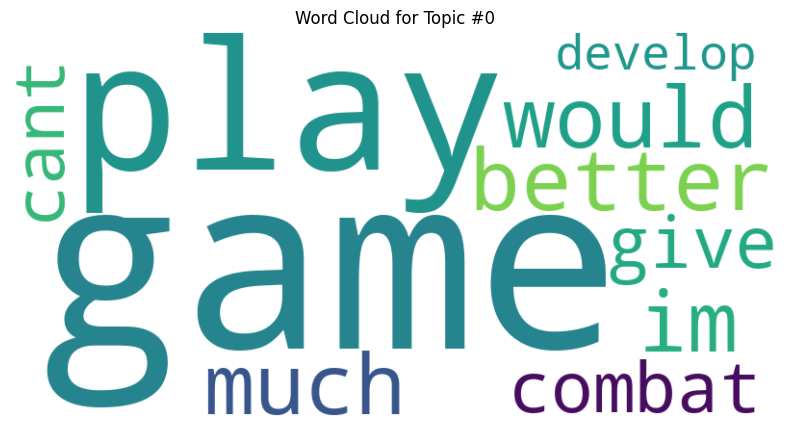

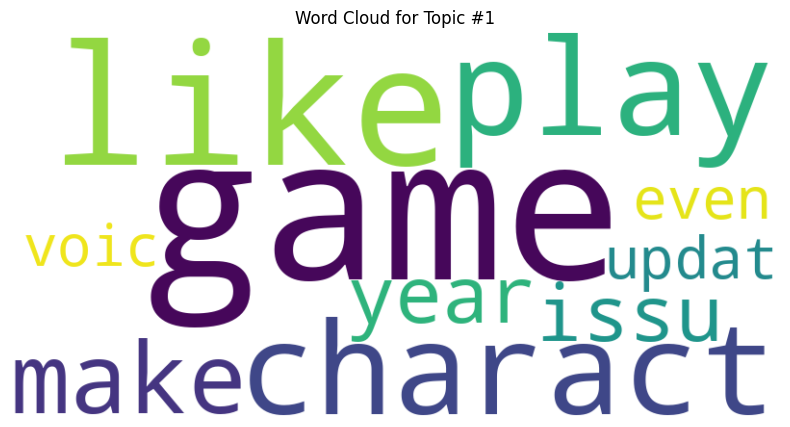

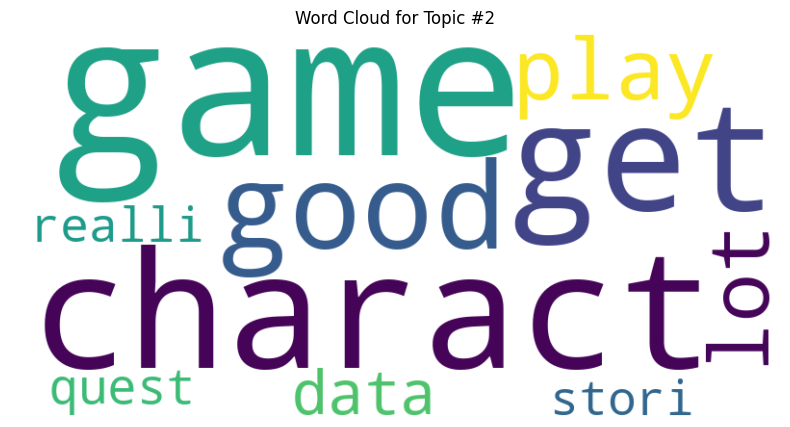

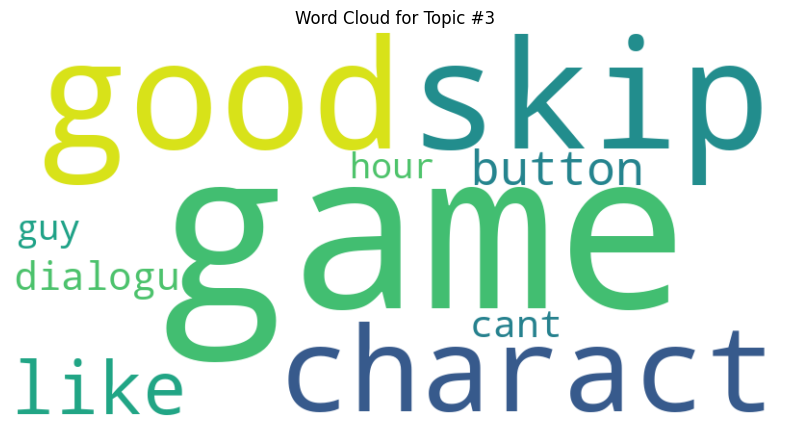

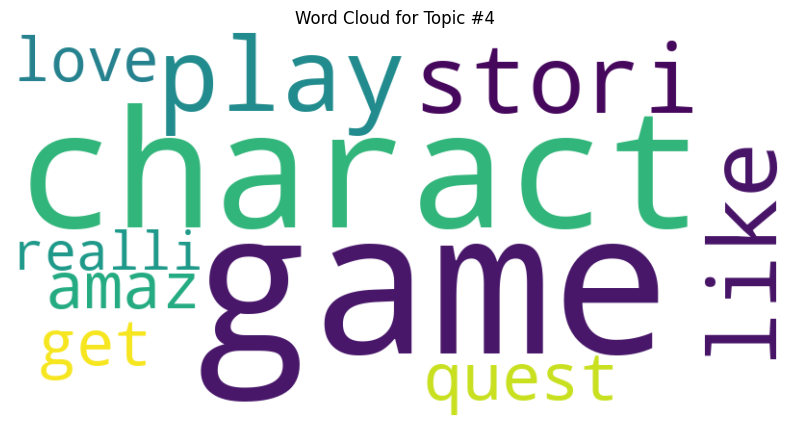

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

# ----- LDA - Latent Dirichlet Allocation untuk Identifikasi Topik -----
num_topics = 5  # Tentukan jumlah topik
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit model LDA pada data TF-IDF
lda_model.fit(X_tfidf)

# Fungsi untuk mencetak kata-kata utama dalam setiap topik
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Top {n_top_words} words for Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

# Menampilkan top 10 kata untuk setiap topik
print_top_words(lda_model, tfidf_features, 10)

# ----- Visualisasi Word Clouds untuk Topik yang Ditemukan -----
def plot_word_cloud_for_topic(model, topic_idx, feature_names, n_top_words=10):
    topic = model.components_[topic_idx]
    top_indices = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_indices]
    top_weights = topic[top_indices]

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(top_words, top_weights)))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for Topic #{topic_idx}")
    plt.axis("off")
    plt.show()

# Visualisasikan word cloud untuk setiap topik
for topic_idx in range(num_topics):
    plot_word_cloud_for_topic(lda_model, topic_idx, tfidf_features)

In [18]:
# ----- Cosine Similarity - Menghitung Kesamaan Antar Ulasan -----

# Fungsi untuk menghitung cosine similarity antara sebuah ulasan dengan semua ulasan lainnya
def calculate_cosine_similarity(query_index, tfidf_matrix):
    """
    Menghitung cosine similarity antara ulasan dengan indeks tertentu
    (query_index) dan semua ulasan lainnya dalam matriks TF-IDF.
    """
    cosine_sim = cosine_similarity(tfidf_matrix[query_index], tfidf_matrix)
    return cosine_sim.flatten()  # Mengubah hasil menjadi array 1D

# Indeks ulasan yang ingin dibandingkan
query_index = 0  # Ulasan pertama (ubah sesuai kebutuhan)

# Hitung cosine similarity
cosine_similarities = calculate_cosine_similarity(query_index, X_tfidf)

# Tampilkan hasil cosine similarity untuk ulasan tertentu
print(f"Cosine Similarity untuk ulasan indeks {query_index}:")
print(cosine_similarities)

# Menampilkan ulasan yang paling mirip (top 5 ulasan, tidak termasuk dirinya sendiri)
top_indices = np.argsort(cosine_similarities)[::-1][1:6]  # Urutkan, abaikan dirinya sendiri
print("\nTop 5 ulasan yang paling mirip:")
for idx in top_indices:
    print(f"Ulasan {idx}: {df.iloc[idx]['cleaned_snippet']}")
    print(f"Cosine Similarity: {cosine_similarities[idx]:.4f}")
    print("-" * 40)

# Rekomendasi ulasan berdasarkan threshold cosine similarity
threshold = 0.2
recommended_indices = np.where(cosine_similarities > threshold)[0]

print(f"\nUlasan yang mirip dengan ulasan indeks {query_index} (Similarity > {threshold}):")
for idx in recommended_indices:
    if idx != query_index:  # Abaikan ulasan itu sendiri
        print(f"Ulasan {idx}: {df.iloc[idx]['snippet']}")
        print(f"Cosine Similarity: {cosine_similarities[idx]:.4f}")
        print("-" * 40)

Cosine Similarity untuk ulasan indeks 0:
[1.         0.01424906 0.09288611 0.08432935 0.0444125  0.00512571
 0.03318228 0.06332775 0.05480097 0.04843333 0.02087177 0.07325729
 0.07518368 0.07817838 0.07808318 0.04699183 0.13580773 0.16891898
 0.06329868 0.14921578 0.03491571 0.07333756 0.15192    0.05351493
 0.01390379 0.11048108 0.0808224  0.08571521 0.0429793  0.09239976
 0.09101276 0.03564845 0.03651867 0.12981423 0.05226442 0.04413207
 0.03245813 0.0316136  0.05955724 0.0433071  0.05134847 0.06803972
 0.03919912 0.06459567 0.05734054 0.04097404 0.06386282 0.05528578
 0.0655393  0.02104425 0.02677823 0.1267928  0.09568388 0.04116949
 0.01964976 0.10882785 0.08745906 0.11489769 0.0236555  0.11265058
 0.05063728 0.04094927 0.04682081 0.07591288 0.01304037 0.03651093
 0.03898557 0.03464714 0.04184216 0.03293507 0.07515181 0.03867942
 0.08972732 0.07902086 0.09015486 0.02399979 0.0292755  0.03830957
 0.03746104 0.01581861 0.04825042 0.04490229 0.13270072 0.03586314
 0.02110815 0.0866061

In [19]:
# Misalnya kita ingin mendapatkan rekomendasi berdasarkan ulasan pertama
# Mengambil ulasan dengan cosine similarity lebih besar dari nilai tertentu (misalnya, > 0.2)
recommended_indices = np.where(cosine_similarities > 0.2)[0]

print("Ulasan yang mirip dengan ulasan pertama (Similarity > 0.2):")
for idx in recommended_indices:
    if idx != query_index:  # Menghindari merekomendasikan ulasan yang sama dengan query
        print(f"Ulasan {idx}: {df.iloc[idx]['snippet']}")
        print(f"Cosine Similarity: {cosine_similarities[idx]}")
        print()


Ulasan yang mirip dengan ulasan pertama (Similarity > 0.2):


In [22]:
# ----- Pembangunan Sistem Rekomendasi -----
# Sistem ini akan merekomendasikan ulasan yang relevan dengan ulasan yang diberikan

def recommend_similar_reviews(query_index, cosine_similarities, threshold=0.2):
    """
    Memberikan rekomendasi ulasan yang mirip berdasarkan cosine similarity.
    
    Parameters:
    - query_index: indeks dari ulasan yang digunakan sebagai query
    - cosine_similarities: array dari similarity scores
    - threshold: batas similarity yang digunakan untuk memilih ulasan yang mirip
    """
    # Mendapatkan indeks-ulasan dengan similarity lebih besar dari threshold
    recommended_indices = np.where(cosine_similarities > threshold)[0]
    
    # Menampilkan rekomendasi ulasan
    print(f"Rekomendasi ulasan yang mirip dengan ulasan indeks {query_index}:")
    for idx in recommended_indices:
        if idx != query_index:  # Menghindari merekomendasikan ulasan yang sama dengan query
            print(f"Ulasan {idx}: {df.iloc[idx]['snippet']}")
            print(f"Cosine Similarity: {cosine_similarities[idx]}")
            print()

# Misalnya kita ingin mendapatkan rekomendasi berdasarkan ulasan pertama
recommend_similar_reviews(query_index, cosine_similarities, threshold=0.2)


Rekomendasi ulasan yang mirip dengan ulasan indeks 0:
